In [28]:
from pathlib import Path
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import statistics

0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN
SITKA AIRPORT, AK US
The average high was: 49.67307692307692
The average low was: 41


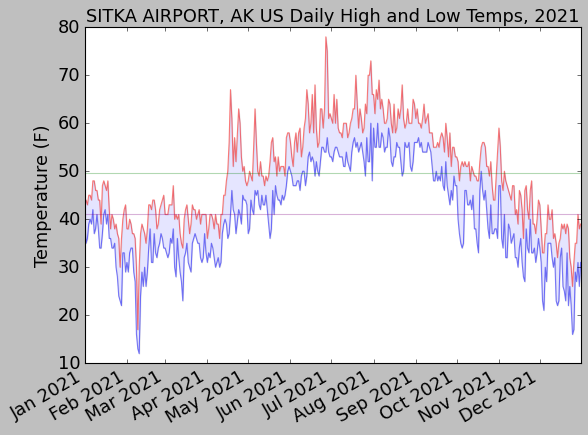

In [75]:
path = Path(r"C:\Users\jonat\OneDrive\Documents\GitHub\Python-Scratch-Repo\python_work\Downloading_Data\weather_data\sitka_weather_2021_simple.csv")
#path = Path(r"C:\Users\jonat\OneDrive\Documents\GitHub\Python-Scratch-Repo\python_work\Downloading_Data\weather_data\death_valley_2021_simple.csv")
lines = path.read_text().splitlines()
'''This will read the file and chain the .splitlines method to get a list of all lines in the file which is then assigned to the variable lines'''

reader = csv.reader(lines)
'''This is an object to parse each line'''

header_row = next(reader)
'''The next function returns the next lien starting from the beginning. In this file the first line is the header'''

#print(header_row)

for index, column_header in enumerate(header_row):
    print(index,column_header)

place_name = ''

#Can rewrite this to use list comprehension
dates, highs, lows = [], [], []
for row in reader:
    if not place_name:
        place_name = row[header_row.index('NAME')]
        print (place_name)
    
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[header_row.index('TMAX')])
        low = int(row[header_row.index('TMIN')])
    except ValueError:
        #print(f"Missing data for {current_date}")
        continue
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)
        

 
#Use below for Sitka if want to use list comprehension
#data = [(datetime.strptime(row[2], '%Y-%m-%d'), int(row[4]), int(row[5])) for row in reader]
#dates = [item[0] for item in data]
#highs = [item[1] for item in data]
#lows = [item[2] for item in data]

highavg = statistics.mean(highs)
lowavg = statistics.mean(lows)

print("The average high was: " + str(highavg) + "\nThe average low was: " + str(lowavg))
#print(dates)
#print(highs)

#Plot the high temps
plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', label= 'high temps', alpha=.5)
ax.plot(dates, lows, color='blue', label= 'low temps', alpha=.5)

ax.fill_between(dates, highs, lows, facecolor='blue', alpha=.1)

plt.axhline(y=highavg,color='green', linestyle = '-', label= 'average high temp', alpha=.3)
plt.axhline(y=lowavg,color='purple', linestyle = '-', label= 'average low temp', alpha=.3)

#plt.legend()
#ax.set_title("Sitka Daily High and Low Temps, 2021", fontsize = 24)
ax.set_title(f"{place_name} Daily High and Low Temps, 2021", fontsize = 16)
ax.set_xlabel('',fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel('Temperature (F)',fontsize=16)
ax.tick_params(labelsize=16)

plt.show()


